In [1]:
import pandas as pd
import numpy as np

# Read in the data
df = pd.read_csv('amazon_reviews.csv')

# Sample the data to speed up computation
# Comment out this line to match with lecture
# df = df.sample(frac=0.1, random_state=10)

df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [2]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
# Drop missing values if any
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [9]:
# Remove any 'neutral' ratings equal to 3
df = df[df['rating'] != 3]

In [10]:
df.info()       #  3150 - 2998 = 152 reviews with rating 3

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            2998 non-null   int64 
 1   date              2998 non-null   object
 2   variation         2998 non-null   object
 3   verified_reviews  2998 non-null   object
 4   feedback          2998 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 140.5+ KB


In [17]:
df['date'].value_counts()   # seems like most of dates are from 2018 lets confirm using describe

30-Jul-18    1530
29-Jul-18     460
28-Jul-18     235
26-Jul-18      81
31-Jul-18      77
             ... 
21-May-18       2
9-Jun-18        1
29-May-18       1
4-Jun-18        1
13-Jun-18       1
Name: date, Length: 77, dtype: int64

In [18]:
df['date'].describe()   # all dates from 2018

count          2998
unique           77
top       30-Jul-18
freq           1530
Name: date, dtype: object

In [23]:
# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
df['positively rated'] = np.where(df.loc[:,'rating'] > 3, 1, 0) # use iloc
df.head(10)

,rating,date,variation,verified_reviews,feedback,positively rated
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,1
4,5,31-Jul-18,Charcoal Fabric,Music,1,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,1
10,5,30-Jul-18,Charcoal Fabric,"I sent it to my 85 year old Dad, and he talks ...",1,1


In [26]:
# Most ratings are positive 1 +ve , 0 -ve
# df['positively rated'].mean()
df['positively rated'].value_counts()

1    2741
0     257
Name: positively rated, dtype: int64

<AxesSubplot: >

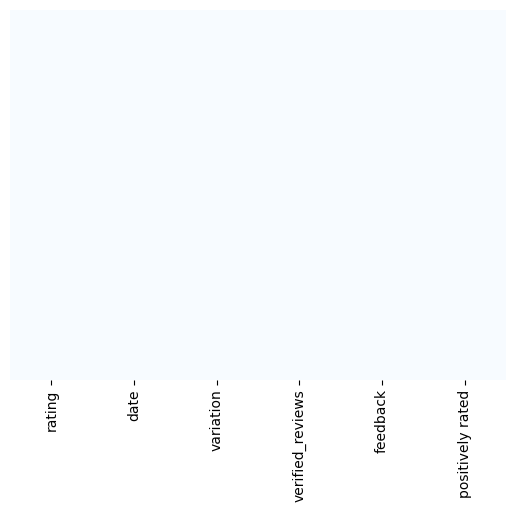

In [32]:
# df['verified_reviews']
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")   # no null values

array([[<AxesSubplot: title={'center': 'rating'}>,
        <AxesSubplot: title={'center': 'feedback'}>],
       [<AxesSubplot: title={'center': 'positively rated'}>,
        <AxesSubplot: >]], dtype=object)

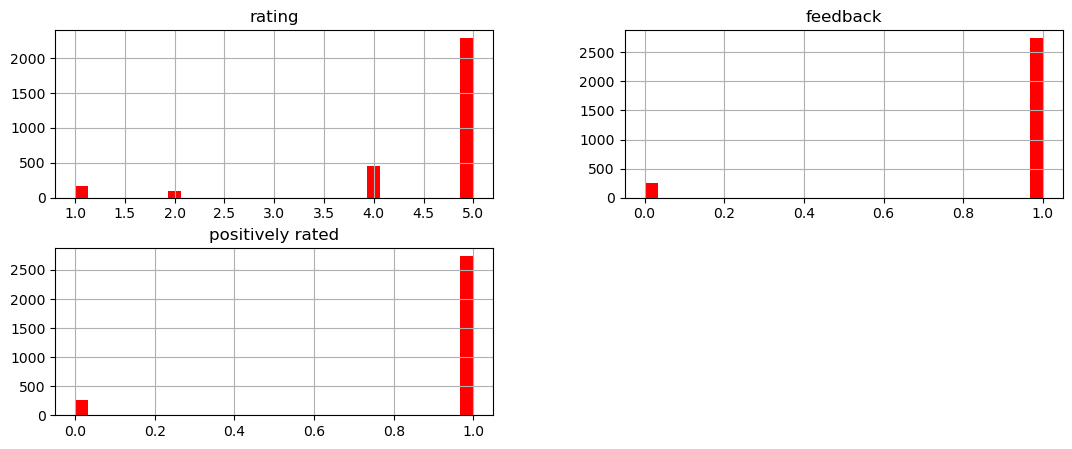

In [33]:
df.hist(bins = 30, figsize = (13,5), color = 'r')

In [42]:
df['feedback'].value_counts()

1    2741
0     257
Name: feedback, dtype: int64

In [43]:
positive = df[df['positively rated'] == 1]['verified_reviews']
negative = df[df['positively rated'] == 0]['verified_reviews']

In [45]:
negative

46      It's like Siri, in fact, Siri answers more acc...
111     Sound is terrible if u want good music too get...
141                                    Not much features.
162     Stopped working after 2 weeks ,didn't follow c...
176                                  Sad joke. Worthless.
                              ...                        
3047    Echo Dot responds to us when we aren't even ta...
3048                NOT CONNECTED TO MY PHONE PLAYLIST :(
3067    The only negative we have on this product is t...
3091                                    I didn’t order it
3096    The product sounded the same as the emoji spea...
Name: verified_reviews, Length: 257, dtype: object

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


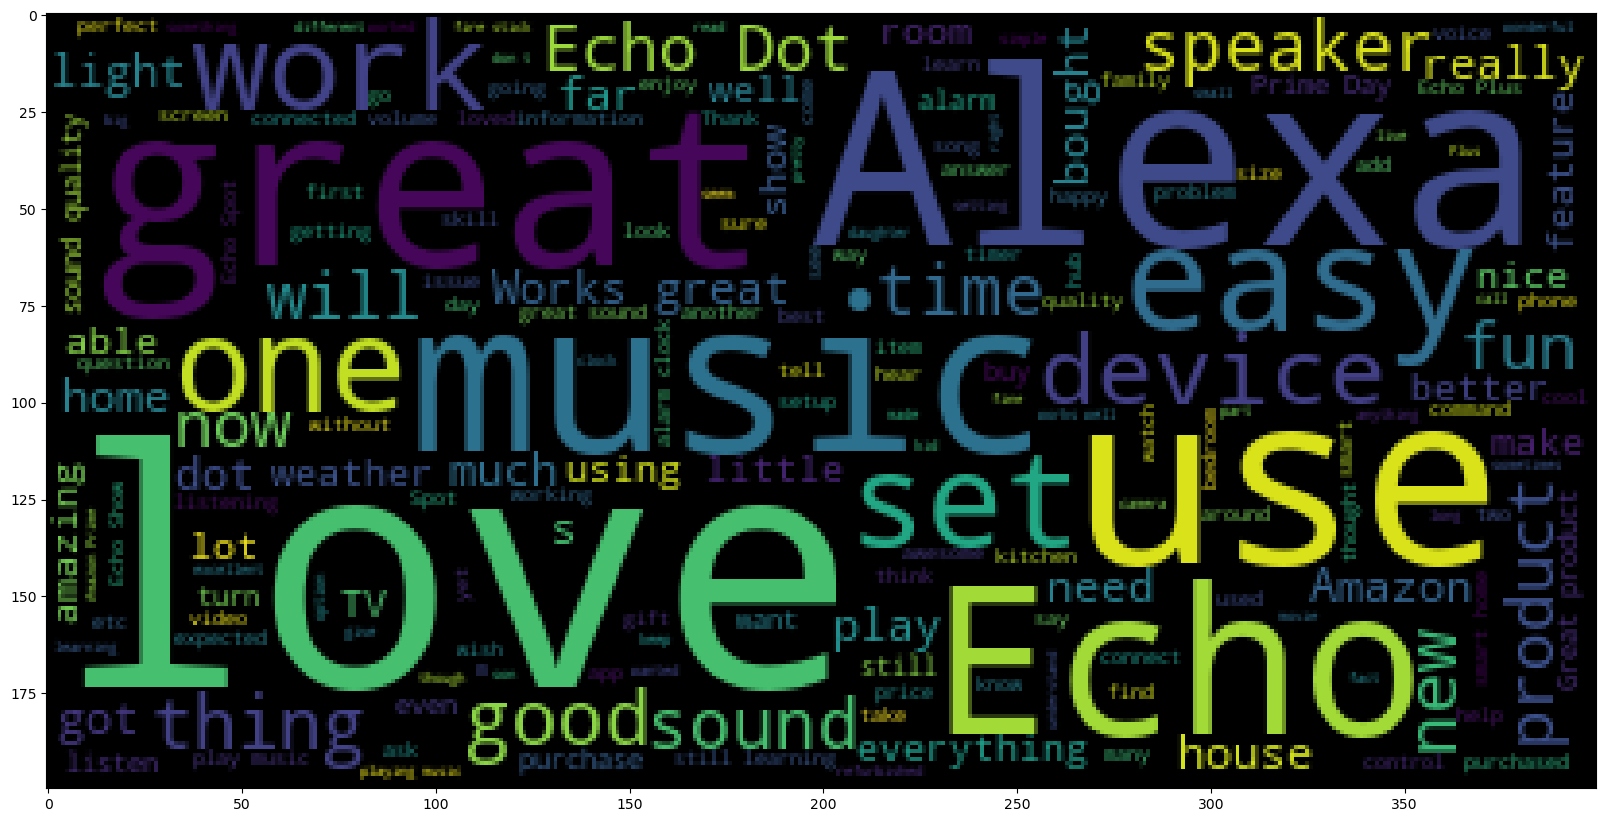

In [59]:

#  positive  reviews word cloud
sentences =" ".join(positive)
len(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences))

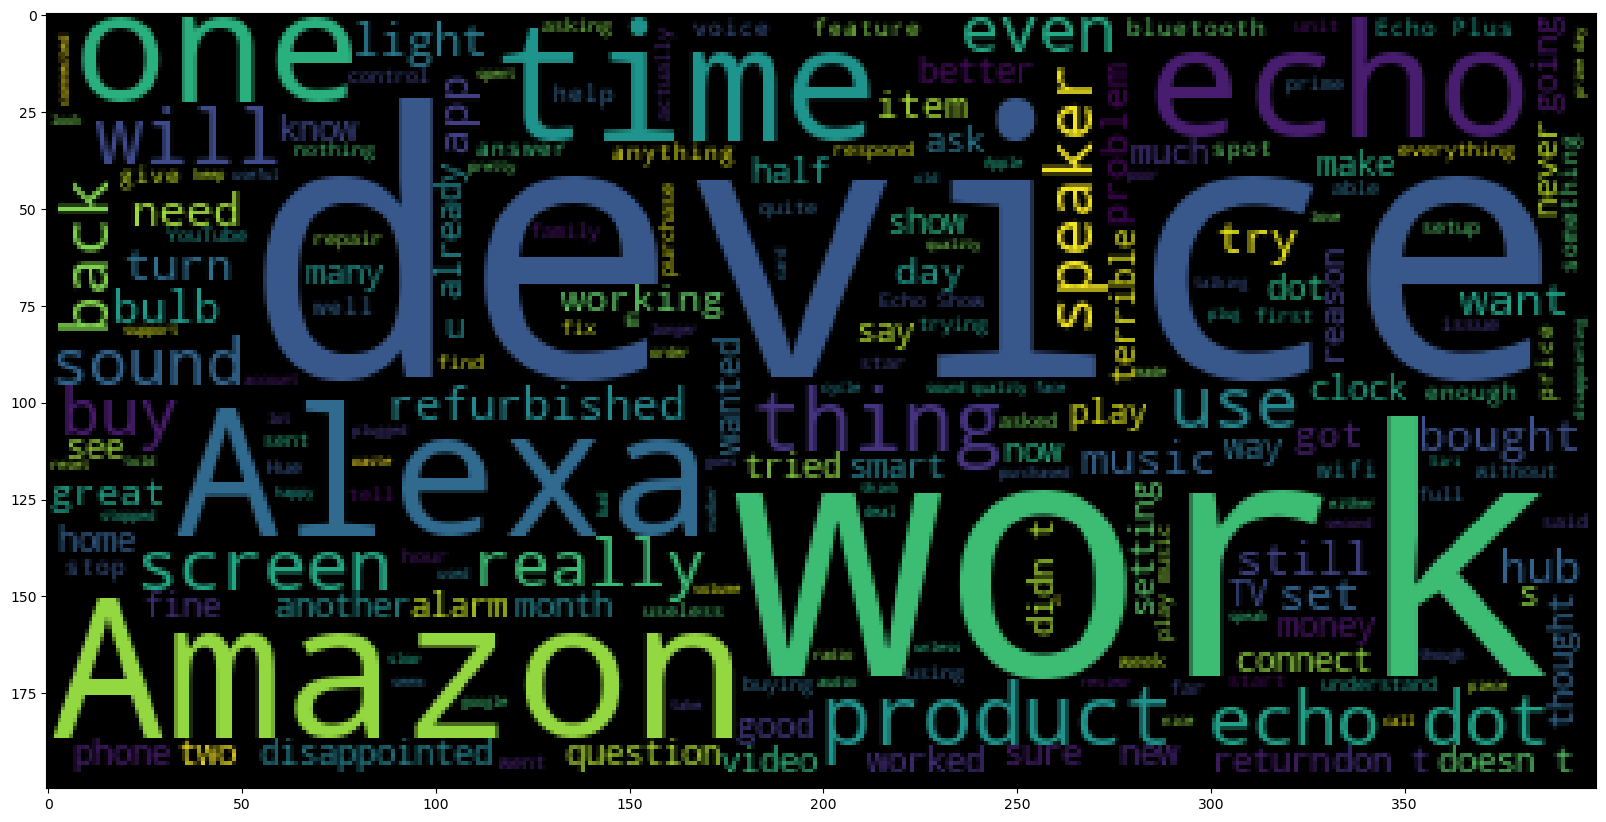

In [60]:
#  negative reviews word cloud
sentences =" ".join(negative)
len(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences))

In [63]:
# no need of positively rated column as feedback is already the target
df.drop('positively rated',axis=1,inplace=True)

In [64]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


Train and test model

In [65]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['verified_reviews'], 
                                                    df['feedback'], 
                                                    random_state=0)


In [66]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 No problems


X_train shape:  (2248,)


In [138]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [139]:
vect.get_feature_names_out()[::200]


array(['00', 'amozon', 'bob', 'collectors', 'decide', 'efficient',
       'finally', 'half', 'instant', 'lit', 'mybedroom', 'part', 'puts',
       'run', 'soaked', 'switching', 'tvs', 'whos'], dtype=object)

In [140]:
len(vect.get_feature_names_out())

3481

In [141]:
Xv = vect.transform(X_train)
Xv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [142]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(Xv, y_train)

LogisticRegression()

In [143]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.737307283359915


In [145]:
feature_names = np.array(vect.get_feature_names_out())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients/features
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['terrible' 'not' 'poor' 'didn' 'doesn' 'back' 'useless' 'cheap' 'low'
 'siri']

Largest Coefs: 
['love' 'easy' 'great' 'amazing' 'nice' 'works' 'good' 'learning' 'fun'
 'best']


In [162]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, device is working',
                                    'an issue, device is not working'])))

[0 0]


# n-grams

In [152]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names_out())

2582

              precision    recall  f1-score   support

           0       0.82      0.48      0.61        66
           1       0.95      0.99      0.97       684

    accuracy                           0.95       750
   macro avg       0.89      0.74      0.79       750
weighted avg       0.94      0.95      0.94       750



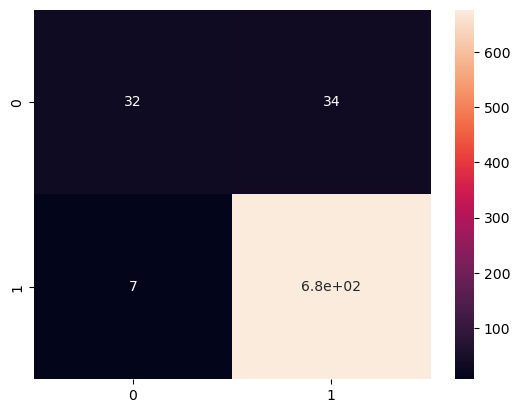

In [164]:
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

y_predict_test = model.predict(vect.transform(X_test))
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_test))
# print('AUC: ', roc_auc_score(y_test, predictions))

In [154]:
feature_names = np.array(vect.get_feature_names_out())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'terrible' 'didn' 'cheap' 'poor' 'useless' 'no' 'back' 'doesn'
 'it like']

Largest Coefs: 
['love' 'great' 'easy' 'love it' 'works' 'nice' 'easy to' 'amazing' 'good'
 'awesome']


In [155]:
# # These reviews are now correctly identified
# print(model.predict(vect.transform(['not an issue, device is working',
#                                     'an issue, device is not working'])))

[0 0]


LogisticRegression classification_report, confusion_matrix

              precision    recall  f1-score   support

           0       0.82      0.48      0.61        66
           1       0.95      0.99      0.97       684

    accuracy                           0.95       750
   macro avg       0.89      0.74      0.79       750
weighted avg       0.94      0.95      0.94       750



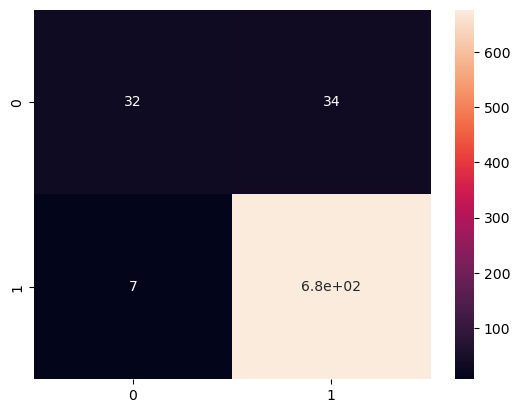

In [166]:
from sklearn.metrics import classification_report, confusion_matrix
# Predicting the Test set results
vect = CountVectorizer().fit(X_train)
model = LogisticRegression()
X_train_vectorized = vect.transform(X_train)
model.fit(X_train_vectorized, y_train)
y_predict_test = model.predict(vect.transform(X_test))  # transform x test
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_test))

In [167]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [168]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [173]:
for i in example:
    print(word_tokenize(i))

['Hello', 'World']
['Hello', 'Hello', 'Hello', 'World', 'world']
['Hello', 'Hello', 'World', 'world', 'world', 'World']
